In [1]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("train.xls")
data.head(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   
6   6   61        1.0   M         NO         0.0     0.0                0   
7   7   36        4.0   M        YES        35.0     0.0                0   
8   8   41        2.0   F        YES        20.0     NaN                0   
9   9   55        2.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0      NaN   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

In [ ]:
data.tail(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3380  3380   56        1.0   F        YES        20.0     0.0   
3381  3381   63        1.0   F         NO         0.0     0.0   
3382  3382   43        4.0   M         NO         0.0     0.0   
3383  3383   57        3.0   F         NO         0.0     0.0   
3384  3384   61        1.0   F         NO         0.0     0.0   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3380                0             0         0    240.0  125.0   79.0  27.38   
3381                0             0         0    205.0  138.0   71.0  33.11   
3382                0             1         0    260.0  129.0   90.0  25.29   
3383                0             0         0    210.0  131.0   85.0  26.59   
3384                0             1         0    217.0  182.0   86.0  26.98   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3380       80.0     82.0           0  
3381       60.0     85.0           1  
3382       70.0     62.0           0  
3383       70.0     77.0           0  
3384      105.0    113.0           0  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [6]:
#Shape of Data
data.shape

(3390, 17)

In [7]:
#infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
#lets describe the data
data.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [9]:
data.count()

id                 3390
age                3390
education          3303
sex                3390
is_smoking         3390
cigsPerDay         3368
BPMeds             3346
prevalentStroke    3390
prevalentHyp       3390
diabetes           3390
totChol            3352
sysBP              3390
diaBP              3390
BMI                3376
heartRate          3389
glucose            3086
TenYearCHD         3390
dtype: int64

In [4]:
label_encoder = preprocessing.LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
  
data['sex'].unique()

array([0, 1])

In [5]:
data.head(2)

id  age  education  sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    0        YES         3.0     0.0                0   
1   1   36        4.0    1         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   

   TenYearCHD  
0           1  
1           0

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['is_smoking']= label_encoder.fit_transform(data['is_smoking'])
  
data['is_smoking'].unique()

array([1, 0])

In [7]:
data.head(2)

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    0           1         3.0     0.0                0   
1   1   36        4.0    1           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   

   TenYearCHD  
0           1  
1           0

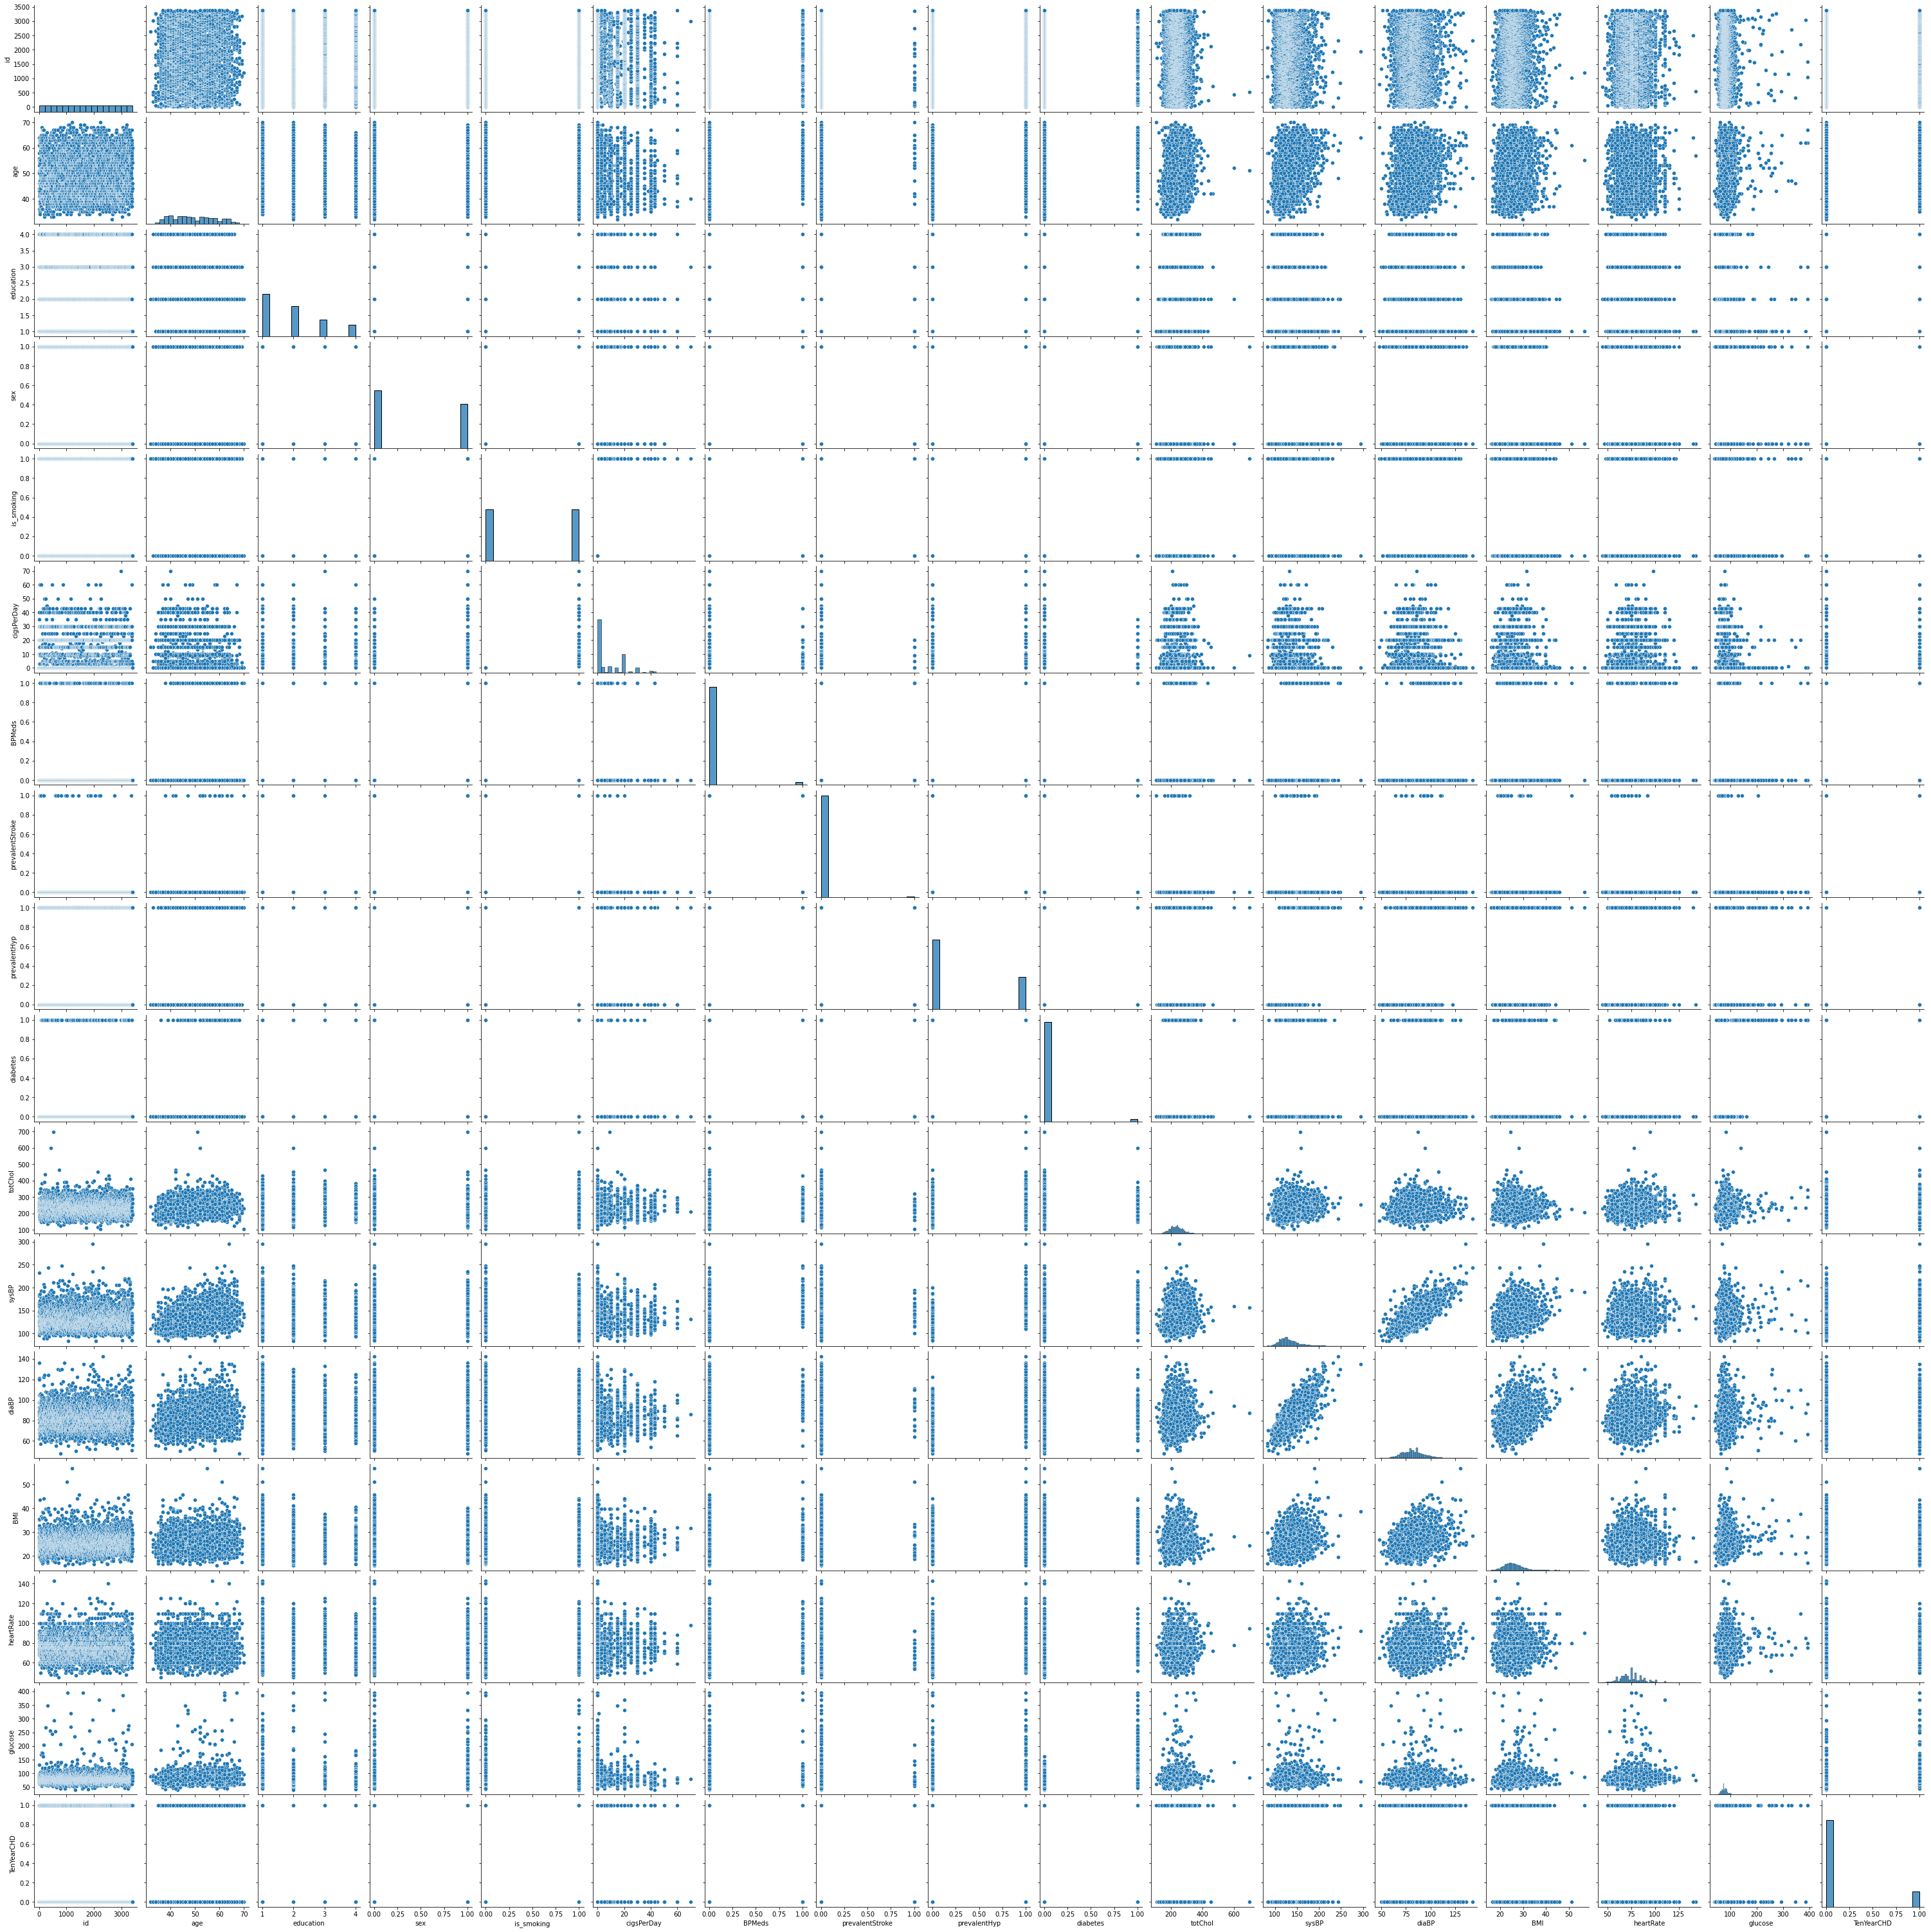

In [ ]:
sns.pairplot(data)

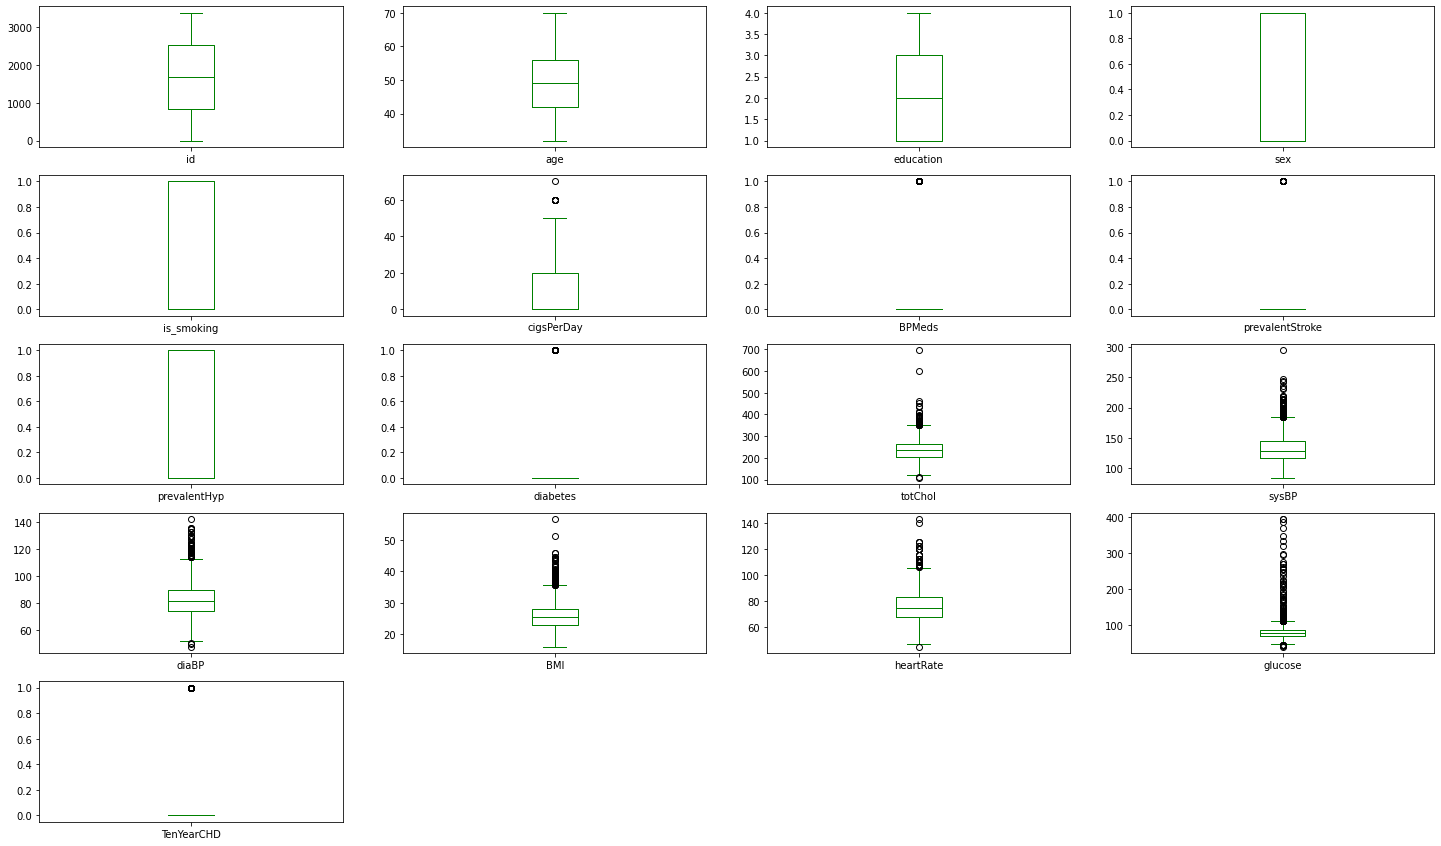

In [ ]:
data.plot(color = 'g', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

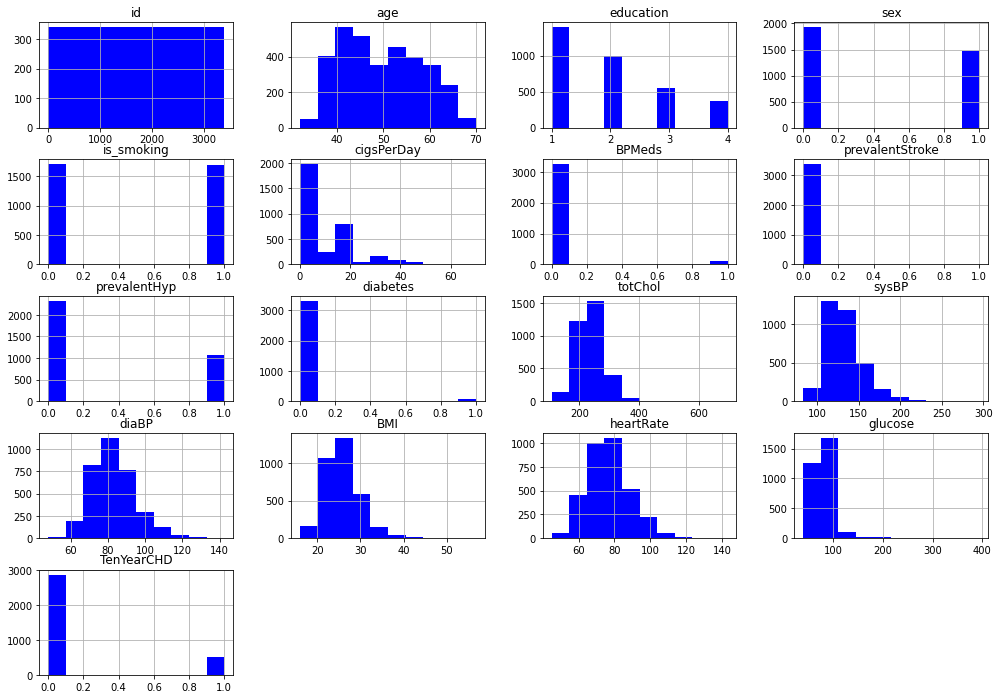

In [ ]:
#histogram
data.hist(color='Blue',bins=10,figsize=(17,12))
plt.show()

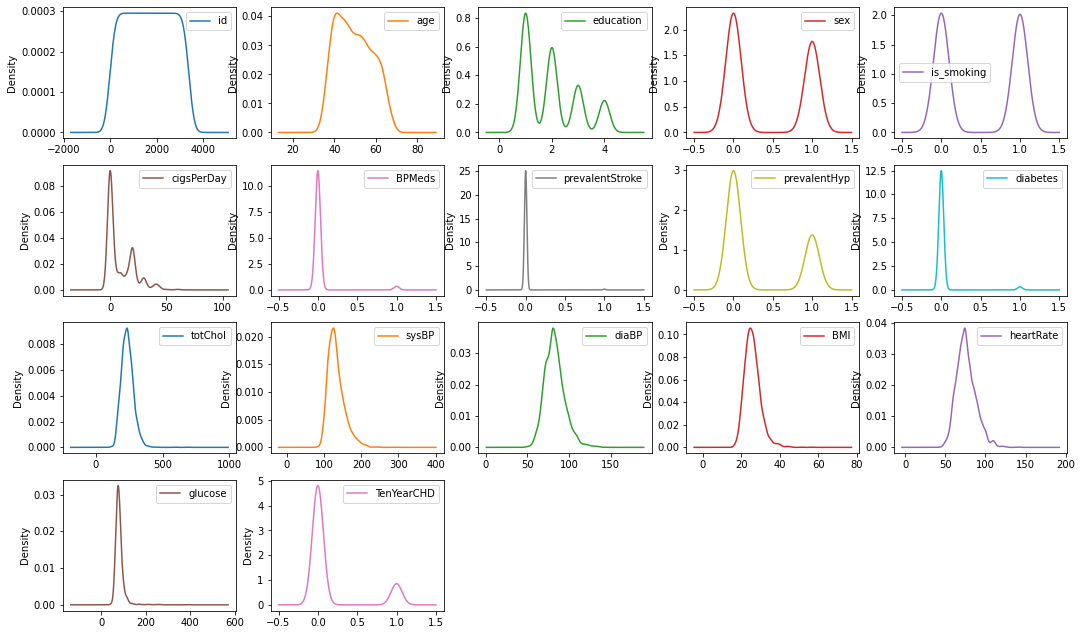

In [ ]:
#Boxplot of each column
data.plot( kind='density', figsize=(18,14), subplots=True, layout=(5,5),sharex=False)
plt.show()

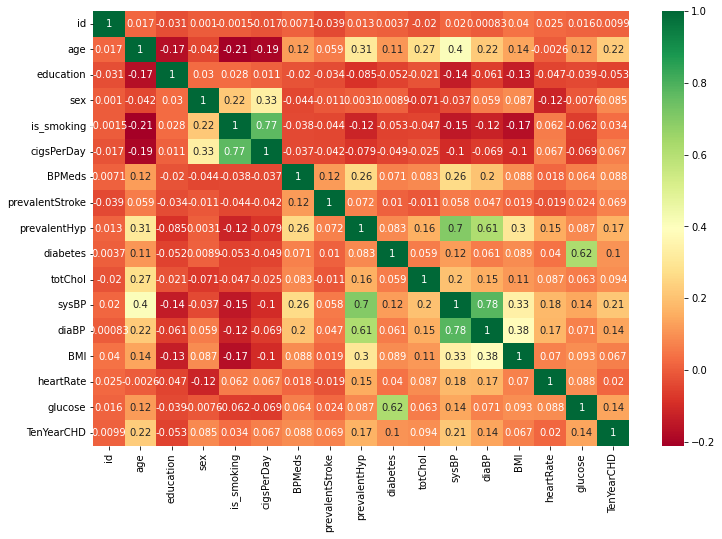

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
import plotly.graph_objects as go

In [ ]:
column_names = data.columns
no_of_boxes = len(column_names)
colors = [ 'hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 360, no_of_boxes)]

fig = go.Figure(data = [go.Box(y = data.loc[:, column_names[i]], marker_color = colors[i], name = column_names[i], boxmean = True, showlegend = True) for i in range(no_of_boxes)])

fig.update_layout(
    xaxis=dict(showgrid = True, zeroline = True, showticklabels = True),
    yaxis=dict(zeroline = True, gridcolor = 'white'),
    paper_bgcolor = 'rgb(233,233,233)',
    plot_bgcolor = 'rgb(233,233,233)')

fig.show()

<AxesSubplot:>

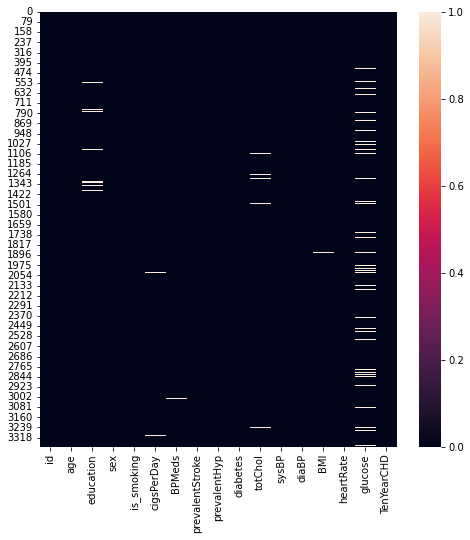

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [8]:
data['education'].fillna(int(data['education'].mean()), inplace=True)

In [9]:
data['cigsPerDay'].fillna(int(data['cigsPerDay'].mean()), inplace=True)

In [10]:
data['BPMeds'].fillna(int(data['BPMeds'].mean()), inplace=True)

In [11]:
data['totChol'].fillna(int(data['totChol'].mean()), inplace=True)

In [12]:
data['BMI'].fillna(int(data['BMI'].mean()), inplace=True)

In [13]:
data['heartRate'].fillna(int(data['heartRate'].mean()), inplace=True)

In [14]:
data['glucose'].fillna(int(data['glucose'].mean()), inplace=True)

In [ ]:
data.head(10)

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    0           1         3.0     0.0                0   
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   
5   5   61        3.0    0           0         0.0     0.0                0   
6   6   61        1.0    1           0         0.0     0.0                0   
7   7   36        4.0    1           1        35.0     0.0                0   
8   8   41        2.0    0           1        20.0     0.0                0   
9   9   55        2.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.00       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0     82.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

In [15]:
data.drop('education', axis=1, inplace=True)

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['totChol'].mean() + 3*data['totChol'].std())
print("Lowest allowed",data['totChol'].mean() - 3*data['totChol'].std())

Highest allowed 372.0525754202362
Lowest allowed 102.09432723463101


In [ ]:
#dealing with out layer values 
data[(data['totChol'] > 350) | (data['totChol'] < 110)]


id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
55      55   51    0           0         0.0     0.0                0   
112    112   57    0           0         0.0     0.0                0   
194    194   56    0           0         0.0     0.0                0   
220    220   47    1           1        18.0     0.0                0   
423    423   52    0           0         0.0     0.0                0   
491    491   61    0           1         9.0     0.0                0   
512    512   51    1           1         9.0     0.0                0   
659    659   63    0           0         0.0     0.0                0   
661    661   57    0           1         9.0     0.0                0   
733    733   42    0           0         0.0     0.0                0   
912    912   60    0           0         0.0     0.0                0   
924    924   63    0           0         0.0     0.0                0   
978    978   54    0           1         5.0     0.0                0   
998    998   61    1           1        20.0     0.0                0   
1026  1026   51    0           1        15.0     0.0                0   
1034  1034   53    0           1        10.0     0.0                0   
1318  1318   57    0           0         0.0     0.0                0   
1371  1371   53    0           0         0.0     0.0                0   
1374  1374   57    0           0         0.0     0.0                0   
1461  1461   47    0           1         9.0     0.0                0   
1740  1740   46    0           1        10.0     0.0                0   
1741  1741   60    0           1        15.0     0.0                0   
1796  1796   43    1           0         0.0     0.0                0   
1938  1938   62    0           0         0.0     0.0                0   
1997  1997   51    0           1         3.0     0.0                0   
2123  2123   42    1           1        15.0     0.0                0   
2188  2188   62    0           1        20.0     1.0                0   
2207  2207   44    1           1        30.0     0.0                0   
2231  2231   70    0           0         0.0     0.0                1   
2296  2296   60    0           1        20.0     0.0                0   
2420  2420   60    0           0         0.0     0.0                0   
2434  2434   62    1           1        30.0     0.0                0   
2445  2445   59    0           0         0.0     0.0                0   
2505  2505   63    0           0         0.0     0.0                0   
2519  2519   53    0           0         0.0     0.0                0   
2534  2534   57    0           0         0.0     1.0                0   
2549  2549   44    0           1         8.0     0.0                0   
2555  2555   52    0           1        20.0     0.0                0   
2557  2557   51    0           0         0.0     1.0                0   
2631  2631   42    1           1         5.0     0.0                0   
3183  3183   59    0           0         0.0     0.0                0   
3308  3308   60    0           0         0.0     0.0                0   
3326  3326   42    1           1        20.0     0.0                0   
3387  3387   44    1           1         3.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
55               1         0    351.0  134.0   97.5  21.66      100.0   
112              1         0    382.0  133.0   77.0  24.27       75.0   
194              1         0    391.0  126.0   84.0  24.83       80.0   
220              1         0    439.0  145.0   74.0  22.42      100.0   
423              1         1    600.0  159.5   94.0  28.27       78.0   
491              1         0    356.0  168.0   98.0  27.30      103.0   
512              1         0    696.0  157.0   87.0  24.44       95.0   
659              1         0    361.0  167.0  100.0  27.31       85.0   
661              0         0    382.0  140.0   94.0  21.20       

In [ ]:
new_df = data[(data['totChol'] <350) & (data['totChol'] >110)]
new_df

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0   64    0           1         3.0     0.0                0   
1        1   36    1           0         0.0     0.0                0   
2        2   46    0           1        10.0     0.0                0   
3        3   50    1           1        20.0     0.0                0   
4        4   64    0           1        30.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3384  3384   61    0           0         0.0     0.0                0   
3385  3385   60    0           0         0.0     0.0                0   
3386  3386   46    0           0         0.0     0.0                0   
3388  3388   60    1           0         0.0     0.0                0   
3389  3389   54    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.00       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3384             1         0    217.0  182.0   86.0  26.98      105.0   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3384    113.0           0  
3385    103.0           0  
3386     84.0           0  
3388     85.0           0  
3389     92.0           0  

[3344 rows x 16 columns]

In [ ]:
#storing the values 
upper_limit = data['totChol'].mean() + 3*data['totChol'].std()
lower_limit = data['totChol'].mean() - 3*data['totChol'].std()

In [ ]:
data['totChol'] = np.where(
    data['totChol']>upper_limit,
    upper_limit,
    np.where(
        data['totChol']<lower_limit,
        lower_limit,
        data['totChol']
    )
)

In [ ]:
data['totChol'].describe()

count    3390.000000
mean      236.744837
std        43.362992
min       107.000000
25%       206.000000
50%       235.000000
75%       264.000000
max       372.052575
Name: totChol, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:

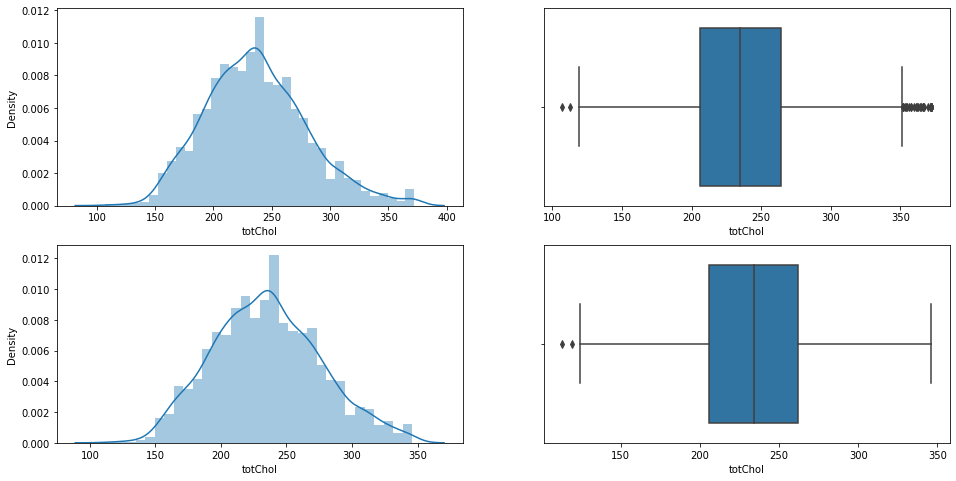

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['totChol'])
plt.subplot(2,2,2)
sns.boxplot(data['totChol'])
plt.subplot(2,2,3)
sns.distplot(new_df['totChol'])
plt.subplot(2,2,4)
sns.boxplot(new_df['totChol'])
plt.show()

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['glucose'].mean() + 3*data['glucose'].std())
print("Lowest allowed",data['glucose'].mean() - 3*data['glucose'].std())

Highest allowed 151.47422363962602
Lowest allowed 12.683298484267794


In [ ]:
#dealing with out layer values 
data[(data['glucose'] > 105) | (data['glucose'] < 55)]

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
15      15   51    1           1        15.0     0.0                0   
77      77   63    0           0         0.0     0.0                0   
96      96   49    0           0         0.0     0.0                0   
107    107   45    1           0         0.0     0.0                0   
115    115   52    0           1        20.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3269  3269   39    0           1        15.0     0.0                0   
3298  3298   46    0           0         0.0     0.0                0   
3316  3316   46    0           0         0.0     0.0                0   
3373  3373   58    0           0         0.0     0.0                0   
3384  3384   61    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
15               0         0    212.0  146.0   89.0  24.49      100.0   
77               1         1    150.0  152.0   88.0  36.54       72.0   
96               1         0    265.0  150.0   77.5  21.83       96.0   
107              0         1    189.0  132.0   78.0  28.40       75.0   
115              0         0    244.0  127.5   72.5  24.29       67.0   
...            ...       ...      ...    ...    ...    ...        ...   
3269             0         0    255.0  142.0   85.5  24.89      100.0   
3298             0         0    213.0  115.0   72.5  19.98       80.0   
3316             0         0    304.0  131.5   78.5  21.02       68.0   
3373             0         1    260.0   85.5   51.0  20.76       87.0   
3384             1         0    217.0  182.0   86.0  26.98      105.0   

      glucose  TenYearCHD  
15      132.0           1  
77      170.0           0  
96      107.0           0  
107     177.0           0  
115     118.0           0  
...       ...         ...  
3269    108.0           0  
3298    107.0           0  
3316    112.0           0  
3373    206.0           1  
3384    113.0           0  

[211 rows x 16 columns]

In [ ]:
new_df = data[(data['glucose'] <105) & (data['glucose'] >55)]
new_df

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0   64    0           1         3.0     0.0                0   
1        1   36    1           0         0.0     0.0                0   
2        2   46    0           1        10.0     0.0                0   
3        3   50    1           1        20.0     0.0                0   
4        4   64    0           1        30.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3385  3385   60    0           0         0.0     0.0                0   
3386  3386   46    0           0         0.0     0.0                0   
3387  3387   44    1           1         3.0     0.0                0   
3388  3388   60    1           0         0.0     0.0                0   
3389  3389   54    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.00       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3157 rows x 16 columns]

In [ ]:
#storing the values 
upper_limit = data['glucose'].mean() + 3*data['glucose'].std()
lower_limit = data['glucose'].mean() - 3*data['glucose'].std()

In [ ]:
data['glucose'] = np.where(
    data['glucose']>upper_limit,
    upper_limit,
    np.where(
        data['glucose']<lower_limit,
        lower_limit,
        data['glucose']
    )
)

In [ ]:
data['glucose'].describe()

count    3390.000000
mean       80.988766
std        15.177862
min        40.000000
25%        72.000000
50%        80.000000
75%        85.000000
max       151.474224
Name: glucose, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:

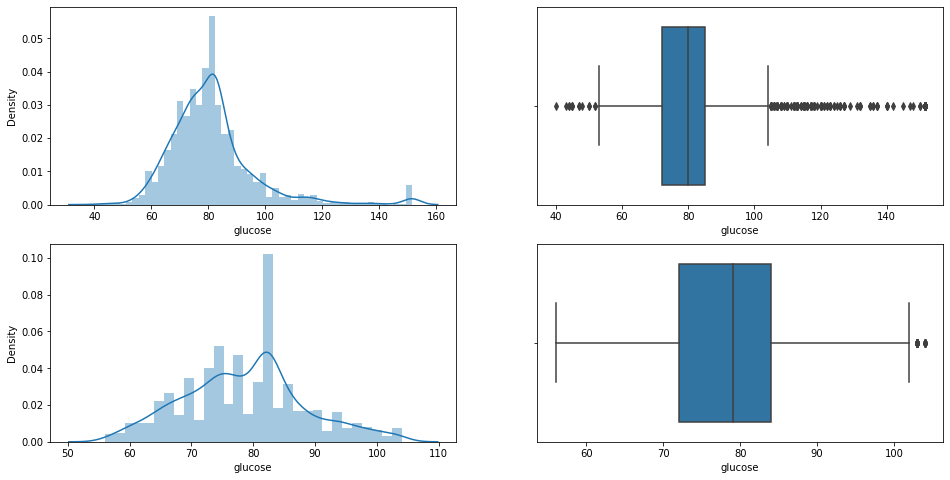

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['glucose'])
plt.subplot(2,2,2)
sns.boxplot(data['glucose'])
plt.subplot(2,2,3)
sns.distplot(new_df['glucose'])
plt.subplot(2,2,4)
sns.boxplot(new_df['glucose'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sysBP'>

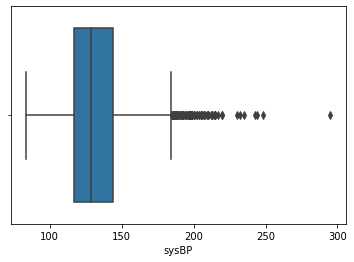

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['sysBP'])

In [ ]:
#dealing with out layer values 
data[(data['sysBP'] > 175) | (data['sysBP'] < 90)]

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
5        5   61    0           0         0.0     0.0                0   
6        6   61    1           0         0.0     0.0                0   
10      10   61    0           0         0.0     0.0                0   
37      37   63    0           0         0.0     0.0                0   
66      66   60    1           1        20.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3296  3296   57    0           1        43.0     0.0                0   
3308  3308   60    0           0         0.0     0.0                0   
3367  3367   59    1           1        20.0     0.0                0   
3373  3373   58    0           0         0.0     0.0                0   
3384  3384   61    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
5                1         0    272.0  182.0  121.0  32.80       85.0   
6                1         0    238.0  232.0  136.0  24.83       75.0   
10               1         0    237.0  185.0  121.0  35.22       80.0   
37               1         0    293.0  186.5   97.0  30.47       60.0   
66               1         0    260.0  178.0  103.0  24.62       72.0   
...            ...       ...      ...    ...    ...    ...        ...   
3296             1         0    283.0  207.5  118.0  38.61      100.0   
3308             1         0    352.0  197.5  105.0  36.29       75.0   
3367             1         0    206.0  187.0   97.0  26.00      100.0   
3373             0         1    260.0   85.5   51.0  20.76       87.0   
3384             1         0    217.0  182.0   86.0  26.98      105.0   

         glucose  TenYearCHD  
5      65.000000           1  
6      79.000000           0  
10     82.000000           0  
37     96.000000           0  
66     79.000000           0  
...          ...         ...  
3296   83.000000           1  
3308   95.000000           1  
3367   69.000000           0  
3373  151.474224           1  
3384  113.000000           0  

[174 rows x 16 columns]

In [ ]:
new_df = data[(data['sysBP'] <175) & (data['sysBP'] >90)]
new_df

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0   64    0           1         3.0     0.0                0   
1        1   36    1           0         0.0     0.0                0   
2        2   46    0           1        10.0     0.0                0   
3        3   50    1           1        20.0     0.0                0   
4        4   64    0           1        30.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3385  3385   60    0           0         0.0     0.0                0   
3386  3386   46    0           0         0.0     0.0                0   
3387  3387   44    1           1         3.0     0.0                0   
3388  3388   60    1           0         0.0     0.0                0   
3389  3389   54    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.00       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3203 rows x 16 columns]

In [ ]:
#storing the values 
upper_limit = data['sysBP'].mean() + 3*data['sysBP'].std()
lower_limit = data['sysBP'].mean() - 3*data['sysBP'].std()

In [ ]:
data['sysBP'] = np.where(
    data['sysBP']>upper_limit,
    upper_limit,
    np.where(
        data['sysBP']<lower_limit,
        lower_limit,
        data['sysBP']
    )
)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:

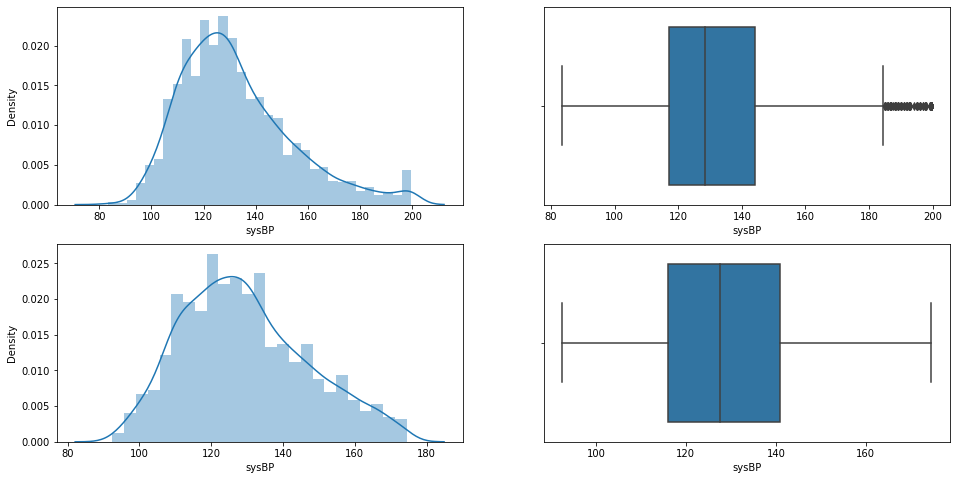

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['sysBP'])
plt.subplot(2,2,2)
sns.boxplot(data['sysBP'])
plt.subplot(2,2,3)
sns.distplot(new_df['sysBP'])
plt.subplot(2,2,4)
sns.boxplot(new_df['sysBP'])
plt.show()

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['heartRate'].mean() + 3*data['heartRate'].std())
print("Lowest allowed",data['heartRate'].mean() - 3*data['heartRate'].std())

Highest allowed 111.8873326343464
Lowest allowed 40.06664966653856


In [ ]:
#dealing with out layer values 
data[(data['heartRate'] > 103) | (data['heartRate'] < 40.85555922142802)]

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
81      81   41    1           1        40.0     0.0                0   
116    116   39    0           0         0.0     0.0                0   
130    130   63    1           0         0.0     0.0                0   
138    138   53    0           0         0.0     0.0                0   
278    278   46    0           0         0.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3176  3176   57    0           1        20.0     1.0                0   
3278  3278   49    0           1        30.0     1.0                0   
3297  3297   46    0           1        20.0     0.0                0   
3365  3365   55    0           0         0.0     0.0                0   
3384  3384   61    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
81               0         0    254.0  141.0  100.0  27.68      110.0   
116              0         0    213.0  125.0   87.0  16.73      110.0   
130              0         1    229.0  109.0   75.0  38.42      110.0   
138              1         0    238.0  172.5   91.0  24.16      112.0   
278              1         0    239.0  166.5  107.0  19.27      110.0   
...            ...       ...      ...    ...    ...    ...        ...   
3176             1         0    262.0  140.0   93.0  22.00      108.0   
3278             1         0    350.0  174.0   90.0  18.44      110.0   
3297             0         0    203.0  117.0   68.0  21.50      110.0   
3365             0         0    310.0  135.0   76.5  26.31      110.0   
3384             1         0    217.0  182.0   86.0  26.98      105.0   

      glucose  TenYearCHD  
81       82.0           1  
116      75.0           0  
130     120.0           0  
138      82.0           0  
278      70.0           0  
...       ...         ...  
3176     82.0           1  
3278     78.0           0  
3297     85.0           0  
3365     74.0           0  
3384    113.0           0  

[73 rows x 16 columns]

In [ ]:
new_df = data[(data['heartRate'] < 103) & (data['heartRate'] >40.85555922142802)]
new_df


id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0   64    0           1         3.0     0.0                0   
1        1   36    1           0         0.0     0.0                0   
2        2   46    0           1        10.0     0.0                0   
3        3   50    1           1        20.0     0.0                0   
4        4   64    0           1        30.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3385  3385   60    0           0         0.0     0.0                0   
3386  3386   46    0           0         0.0     0.0                0   
3387  3387   44    1           1         3.0     0.0                0   
3388  3388   60    1           0         0.0     0.0                0   
3389  3389   54    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.00       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3313 rows x 16 columns]

In [ ]:
#storing the values 
upper_limit = data['heartRate'].mean() + 3*data['heartRate'].std()
lower_limit = data['heartRate'].mean() - 3*data['heartRate'].std()

In [ ]:
data['heartRate'] = np.where(
    data['heartRate']>upper_limit,
    upper_limit,
    np.where(
        data['heartRate']<lower_limit,
        lower_limit,
        data['heartRate']
    )
)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:

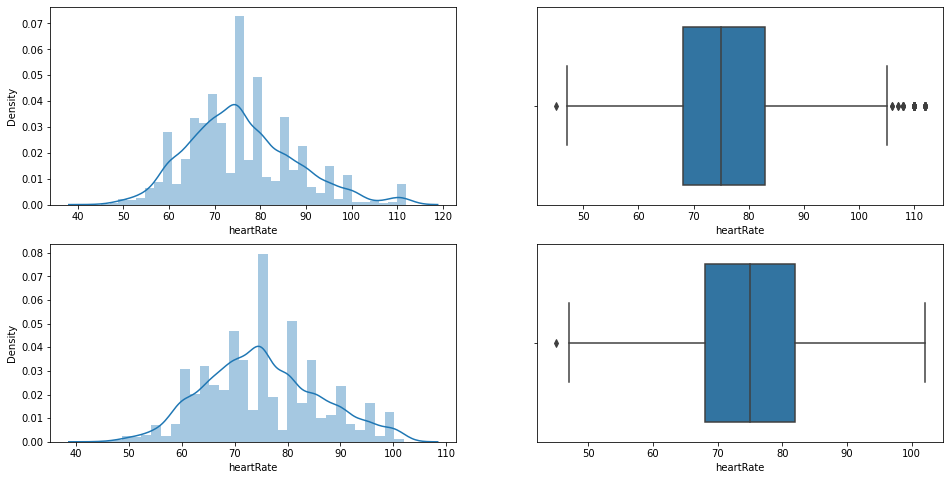

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['heartRate'])
plt.subplot(2,2,2)
sns.boxplot(data['heartRate'])
plt.subplot(2,2,3)
sns.distplot(new_df['heartRate'])
plt.subplot(2,2,4)
sns.boxplot(new_df['heartRate'])
plt.show()

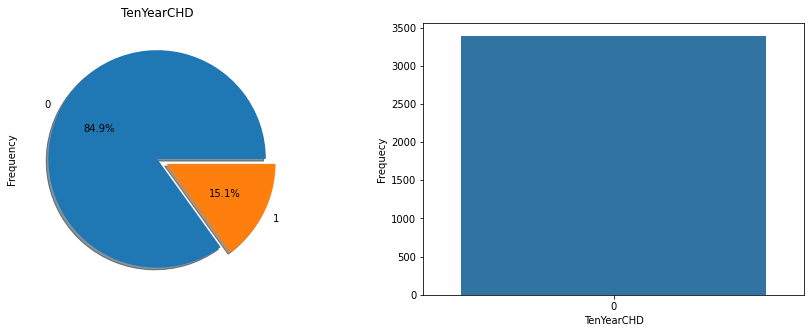

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['TenYearCHD'])
#plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("TenYearCHD")
plt.ylabel("Frequecy")

#Piechart show
data['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('Frequency')
plt.show()

In [16]:
data_boxcox = data.copy()
X = data_boxcox.drop(["TenYearCHD"],axis=1)
Y = data_boxcox["TenYearCHD"]

In [17]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.TenYearCHD==0]
df_minority = data_bal[data_bal.TenYearCHD==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=268,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.TenYearCHD.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=2000,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.TenYearCHD.value_counts())

Downsampled data:->
 1    511
0    268
Name: TenYearCHD, dtype: int64
Upsampled data:->
 0    2879
1    2000
Name: TenYearCHD, dtype: int64


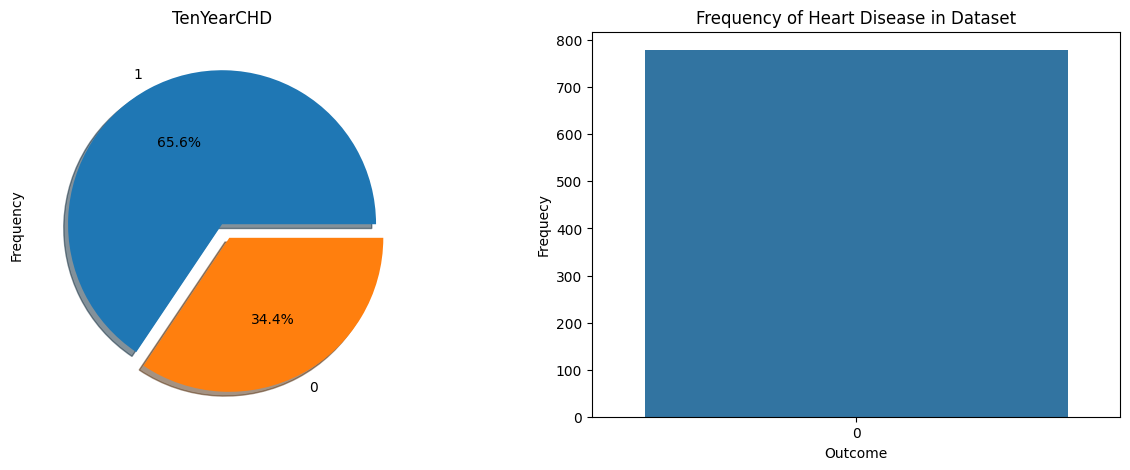

In [17]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_downsampled['TenYearCHD'])
plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")

#Piechart show
df_downsampled['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('Frequency')
plt.show()

ValueError: ignored

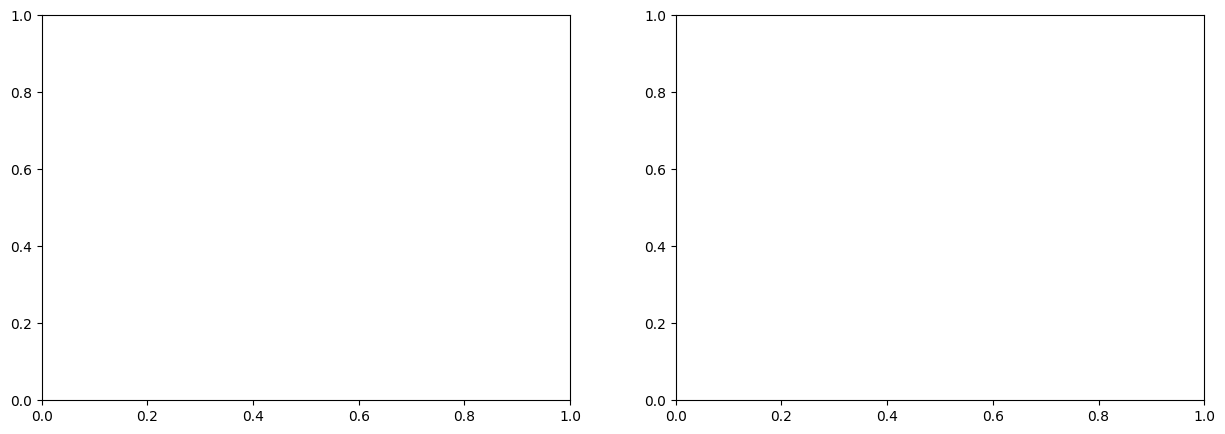

In [18]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_upsampled['TenYearCHD'])
plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")
#Piechart show
df_upsampled['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('Frequency')
plt.show()

In [18]:
#lets describe the data
df_upsampled.describe().T

count         mean         std     min    25%     50%  \
id               4879.0  1706.618364  982.791831    0.00  838.5  1720.0   
age              4879.0    50.884812    8.615794   32.00   44.0    51.0   
sex              4879.0     0.458291    0.498308    0.00    0.0     0.0   
is_smoking       4879.0     0.503382    0.500040    0.00    0.0     1.0   
cigsPerDay       4879.0     9.485140   12.204815    0.00    0.0     1.0   
BPMeds           4879.0     0.039147    0.193965    0.00    0.0     0.0   
prevalentStroke  4879.0     0.010658    0.102696    0.00    0.0     0.0   
prevalentHyp     4879.0     0.373847    0.483873    0.00    0.0     0.0   
diabetes         4879.0     0.036483    0.187508    0.00    0.0     0.0   
totChol          4879.0   240.416274   46.465582  107.00  210.0   237.0   
sysBP            4879.0   136.147264   24.842451   83.50  119.0   131.0   
diaBP            4879.0    84.214183   12.801587   48.00   75.0    83.0   
BMI              4879.0    26.036448    4.251005   15.96   23.1    25.6   
heartRate        4879.0    76.052675   11.967527   45.00   68.0    75.0   
glucose          4879.0    84.020291   29.465781   40.00   72.0    80.0   
TenYearCHD       4879.0     0.409920    0.491869    0.00    0.0     0.0   

                     75%     max  
id               2555.50  3389.0  
age                58.00    70.0  
sex                 1.00     1.0  
is_smoking          1.00     1.0  
cigsPerDay         20.00    70.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           267.00   696.0  
sysBP             148.25   295.0  
diaBP              91.50   142.5  
BMI                28.35    56.8  
heartRate          83.00   143.0  
glucose            86.50   394.0  
TenYearCHD          1.00     1.0

In [19]:
#lets describe the data
df_downsampled.describe().T

count         mean         std     min      25%      50%  \
id               779.0  1720.023107  976.041991    0.00  870.500  1744.00   
age              779.0    52.562259    8.587201   34.00   45.000    53.00   
sex              779.0     0.490372    0.500228    0.00    0.000     0.00   
is_smoking       779.0     0.525032    0.499694    0.00    0.000     1.00   
cigsPerDay       779.0    10.385109   12.622381    0.00    0.000     3.00   
BPMeds           779.0     0.051348    0.220848    0.00    0.000     0.00   
prevalentStroke  779.0     0.014121    0.118064    0.00    0.000     0.00   
prevalentHyp     779.0     0.432606    0.495756    0.00    0.000     0.00   
diabetes         779.0     0.051348    0.220848    0.00    0.000     0.00   
totChol          779.0   243.418485   48.411576  107.00  210.000   240.00   
sysBP            779.0   139.365212   25.952184   83.50  121.000   134.00   
diaBP            779.0    85.227856   13.409906   48.00   76.000    84.00   
BMI              779.0    26.324583    4.568201   15.96   23.175    25.86   
heartRate        779.0    76.537869   12.240921   50.00   68.000    75.00   
glucose          779.0    86.793325   34.746451   40.00   73.000    81.00   
TenYearCHD       779.0     0.655969    0.475356    0.00    0.000     1.00   

                     75%     max  
id               2554.00  3387.0  
age                60.00    70.0  
sex                 1.00     1.0  
is_smoking          1.00     1.0  
cigsPerDay         20.00    60.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           272.00   600.0  
sysBP             152.50   295.0  
diaBP              92.50   135.0  
BMI                28.82    56.8  
heartRate          85.00   125.0  
glucose            88.00   394.0  
TenYearCHD          1.00     1.0

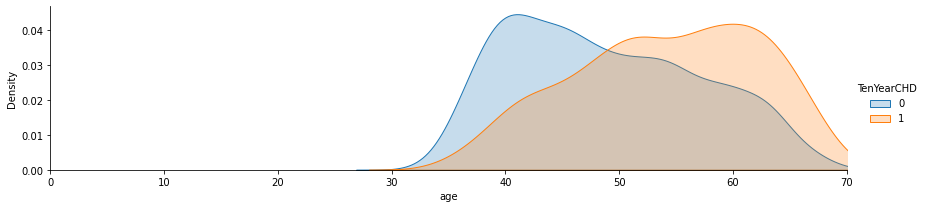

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

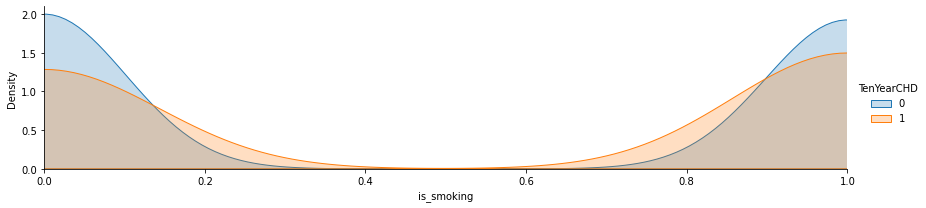

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'is_smoking', shade=True)
oldest = data['is_smoking'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

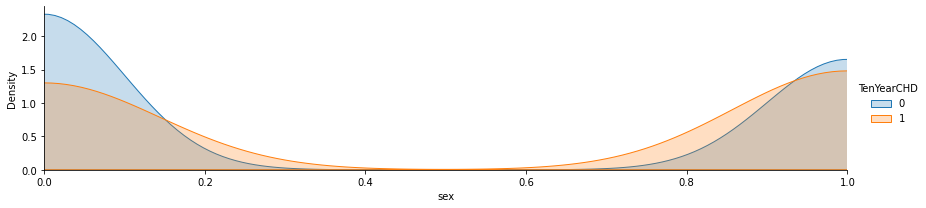

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'sex', shade=True)
oldest = data['sex'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

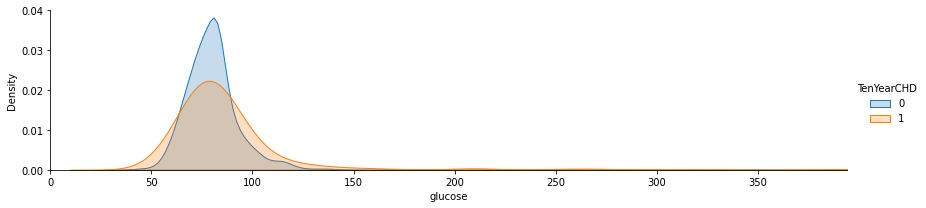

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'glucose', shade=True)
oldest = data['glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

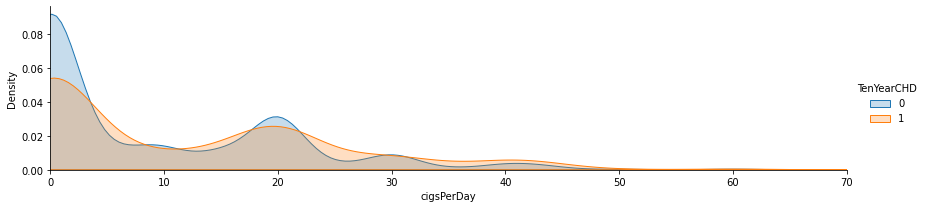

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'cigsPerDay', shade=True)
oldest = data['cigsPerDay'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

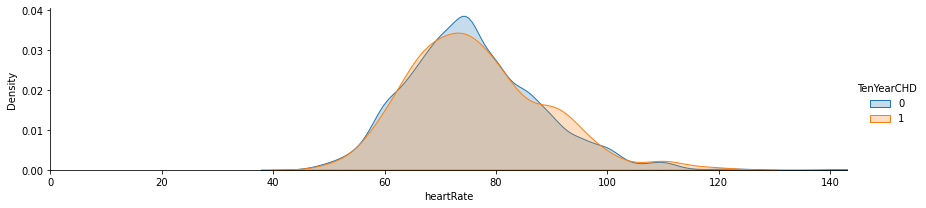

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'heartRate', shade=True)
oldest = data['heartRate'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

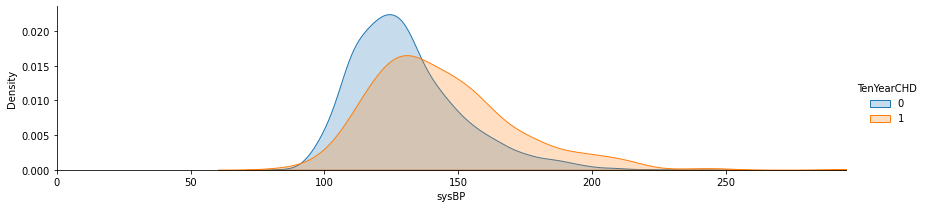

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'sysBP', shade=True)
oldest = data['sysBP'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

<Figure size 2160x2160 with 0 Axes>

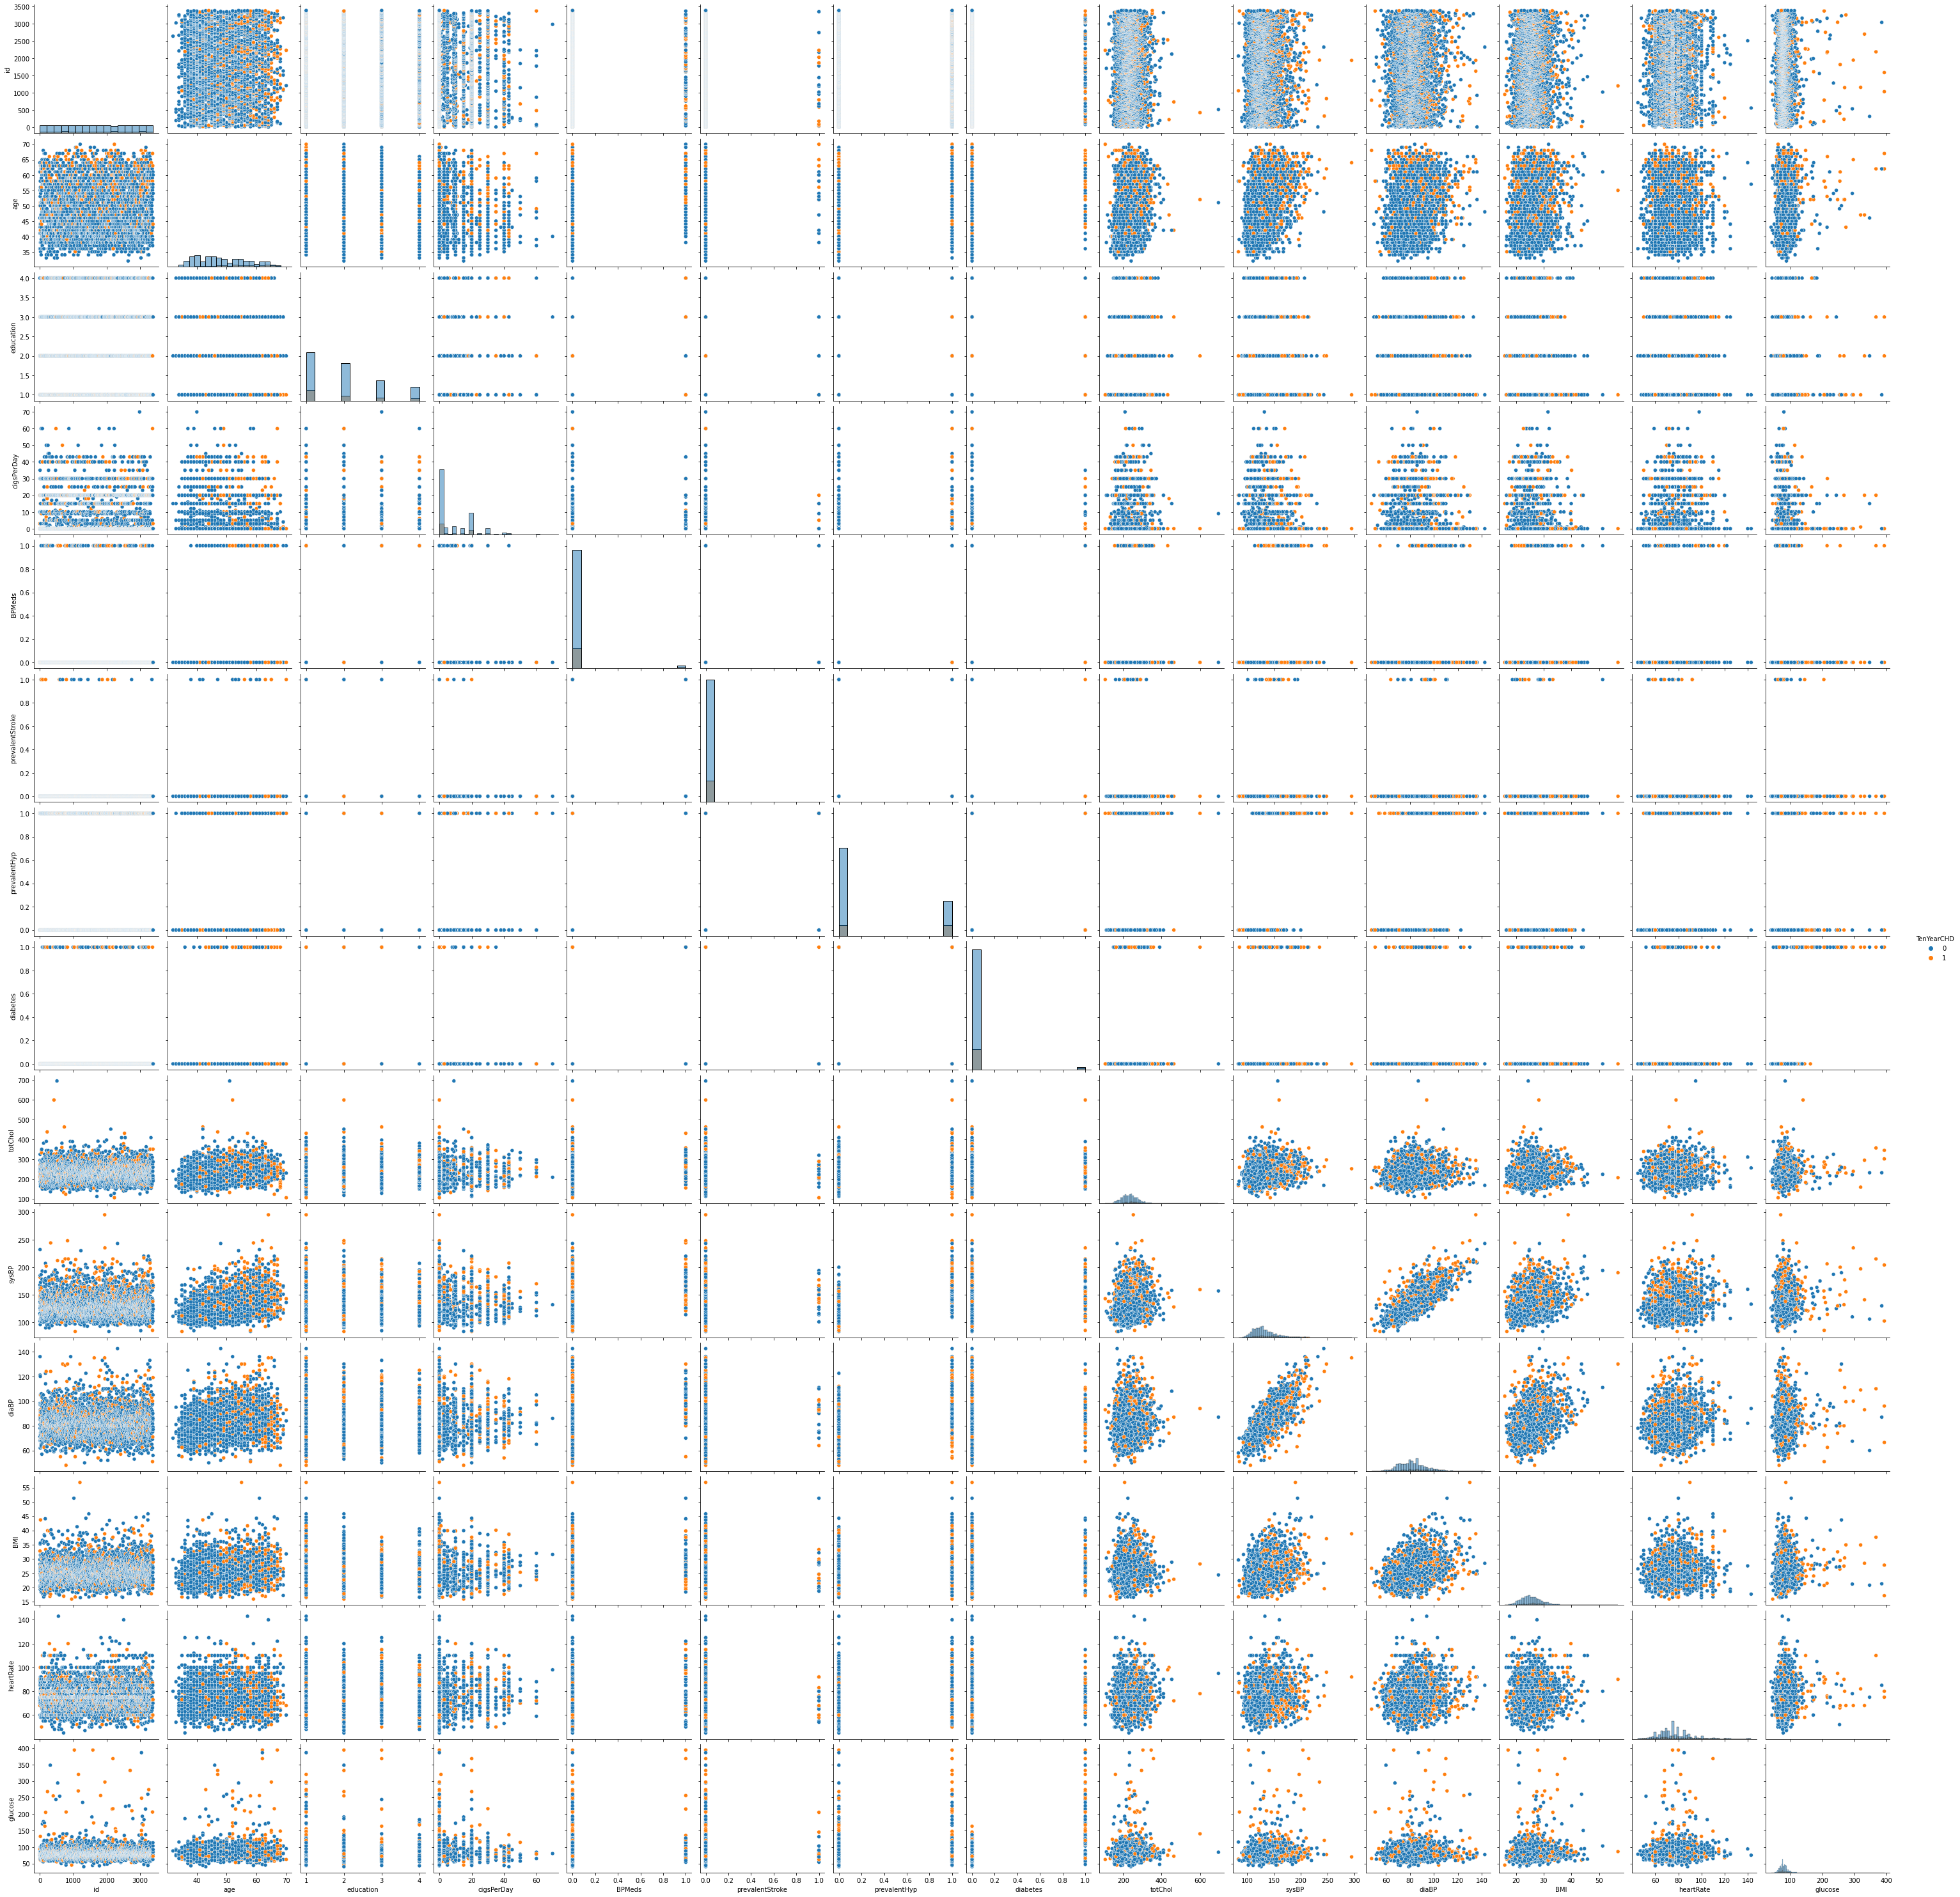

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, hue='TenYearCHD', height=3, diag_kind='hist')

In [ ]:
#reading data from pandas
col_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
df = pd.read_csv("train.xls", header=1, names=col_names)

<AxesSubplot:>

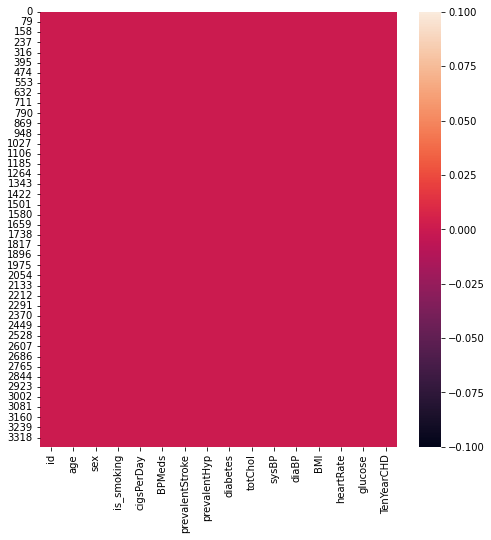

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

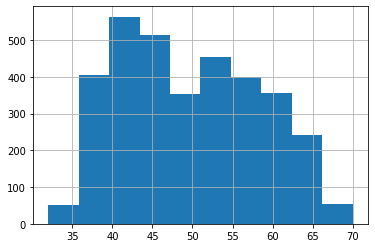

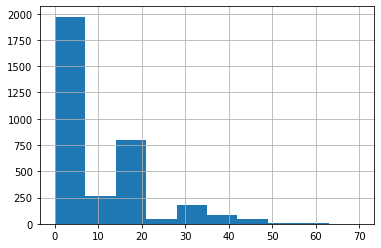

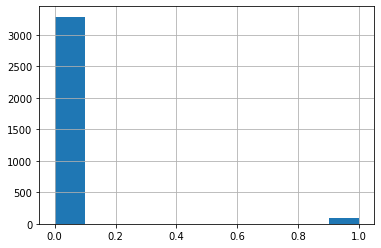

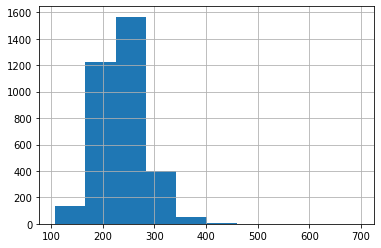

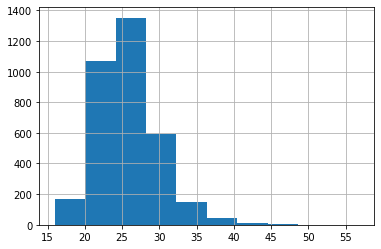

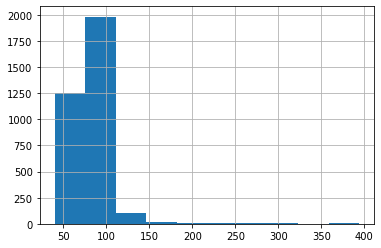

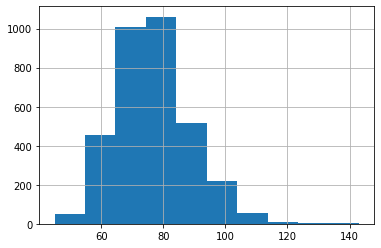

After normal distibution operation



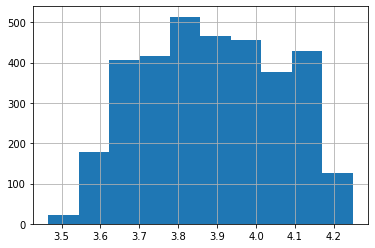

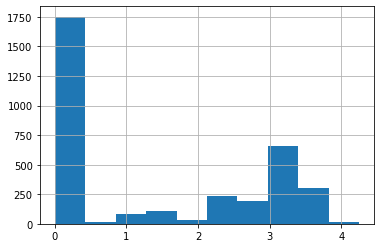

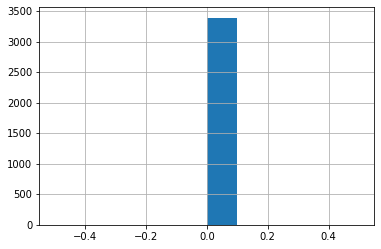

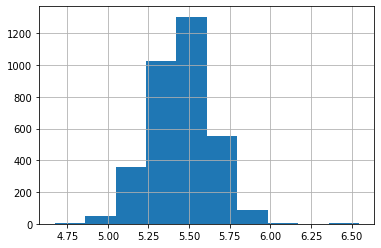

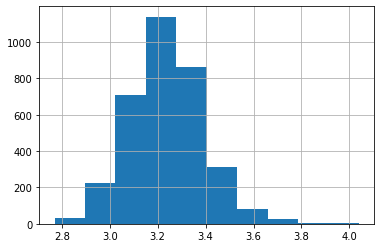

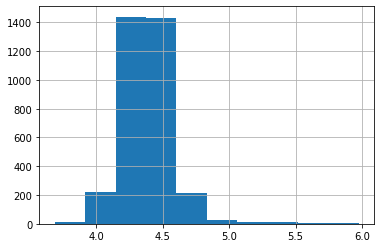

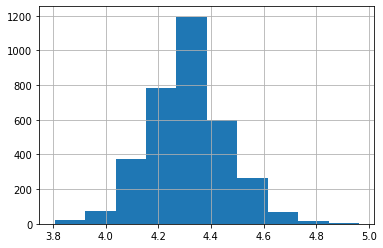

In [ ]:
#'age' , 'sex', 'cigsPerDay', 'BPMeds',  'totChol', 'BMI', 'heartRate', 'glucose' 
data_new = data.copy()

data_new["age"].hist()
plt.show()
data_new["cigsPerDay"].hist()
plt.show()
data_new["BPMeds"].hist()
plt.show()
data_new["totChol"].hist()
plt.show()
data_new["BMI"].hist()
plt.show()
data_new["glucose"].hist()
plt.show()
data_new["heartRate"].hist()
plt.show()

data_new["age"] = [np.log(i) if i!=0 else 0 for i in data_new["age"]]
data_new["cigsPerDay"] = [np.log(i) if i!=0 else 0 for i in data_new["cigsPerDay"]]
data_new["BPMeds"] = [np.log(i) if i!=0 else 0 for i in data_new["BPMeds"]]
data_new["totChol"] = [np.log(i) if i!=0 else 0 for i in data_new["totChol"]]
data_new["BMI"] = [np.log(i) if i!=0 else 0 for i in data_new["BMI"]]
data_new["glucose"] = [np.log(i) if i!=0 else 0 for i in data_new["glucose"]]
data_new["heartRate"] = [np.log(i) if i!=0 else 0 for i in data_new["heartRate"]]

print("="*10,"\nAfter normal distibution operation\n")

data_new["age"].hist()
plt.show()
data_new["cigsPerDay"].hist()
plt.show()
data_new["BPMeds"].hist()
plt.show()
data_new["totChol"].hist()
plt.show()
data_new["BMI"].hist()
plt.show()
data_new["glucose"].hist()
plt.show()
data_new["heartRate"].hist()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       540
           1       0.97      0.84      0.90       436

    accuracy                           0.92       976
   macro avg       0.93      0.91      0.91       976
weighted avg       0.92      0.92      0.92       976

0.9170081967213115


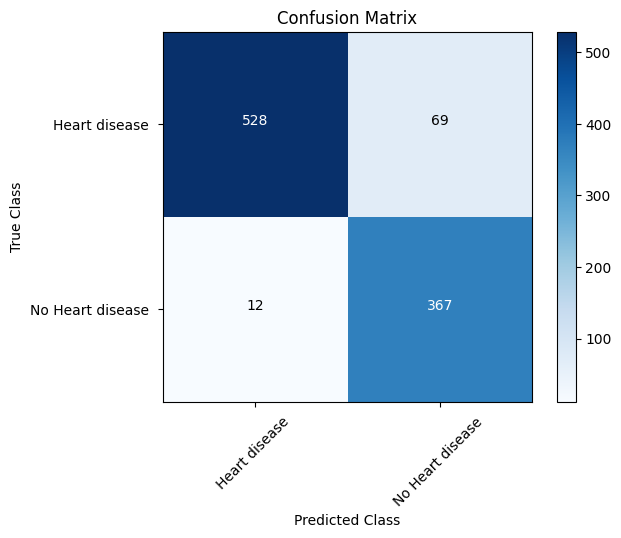

In [22]:
from sklearn import  metrics 
classes = ["Heart disease ", "No Heart disease "]
X = df_upsampled.drop(["TenYearCHD"],axis=1)
Y = df_upsampled["TenYearCHD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#confusion_matrix(XGBR,X_test,y_test,labels=["Heart Disease","No-Heart Disease"],cm=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
featur_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
features = XGBR.feature_importances_
features

array([0.03076518, 0.04241412, 0.0280909 , 0.02450028, 0.01863672,
       0.02621581, 0.34073415, 0.        , 0.02351246, 0.24717371,
       0.03455588, 0.03999415, 0.03928909, 0.03500191, 0.03587921,
       0.03323643], dtype=float32)

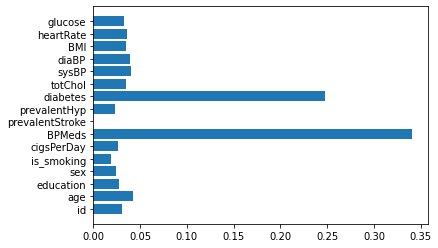

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

In [ ]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [23]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [25]:
X = np.array(df_upsampled[['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']])
Y = np.array(df_upsampled.TenYearCHD)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       540
           1       0.97      0.84      0.90       436

    accuracy                           0.92       976
   macro avg       0.93      0.91      0.91       976
weighted avg       0.92      0.92      0.92       976

0.9170081967213115


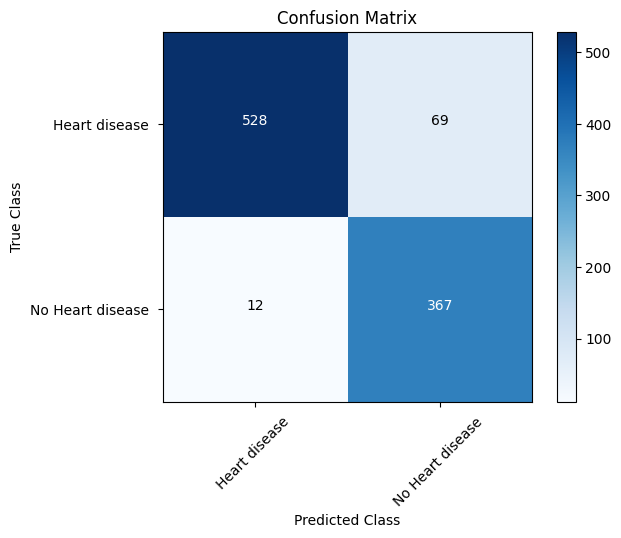

In [26]:
#XGB
X = df_upsampled.drop(["TenYearCHD"],axis=1)
Y = df_upsampled["TenYearCHD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model1 = XGBClassifier (learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
fpr_Model1, tpr_Model1, thresholds_Model1 = roc_curve(y_test, y_pred)
roc_auc_Model1 = auc (fpr_Model1, tpr_Model1)
precision_Model1, recall_Model1, th_Model1 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

#plot_confusion_matrix(Model1,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
features =Model1.feature_importances_
features

array([0.03076518, 0.04241412, 0.0280909 , 0.02450028, 0.01863672,
       0.02621581, 0.34073415, 0.        , 0.02351246, 0.24717371,
       0.03455588, 0.03999415, 0.03928909, 0.03500191, 0.03587921,
       0.03323643], dtype=float32)

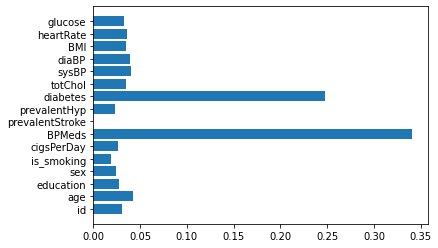

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       585
           1       0.67      0.65      0.66       391

    accuracy                           0.73       976
   macro avg       0.72      0.72      0.72       976
weighted avg       0.73      0.73      0.73       976

0.7295081967213115


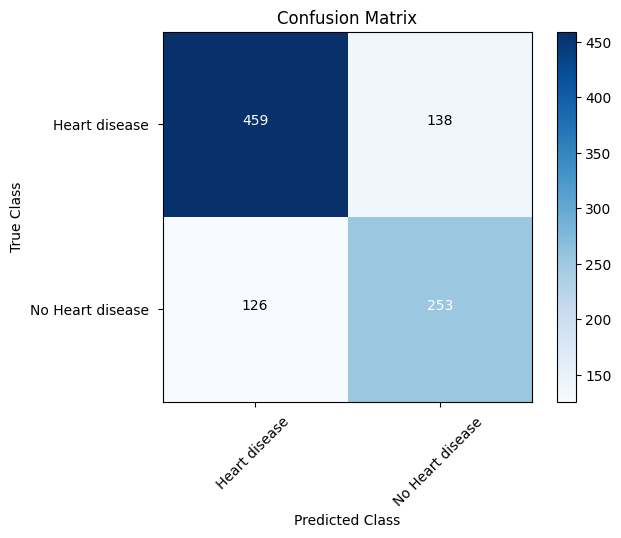

In [27]:
#Ada Boost
X = df_upsampled.drop(["TenYearCHD"],axis=1)
Y = df_upsampled["TenYearCHD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model2 = AdaBoostClassifier(n_estimators=20000,learning_rate=0.1,random_state=None)
#(random_state=0, learning_rate =0.1,n_estimators=100)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
fpr_Model2, tpr_Model2, thresholds_Model2 = roc_curve(y_test, y_pred)
roc_auc_Model2 = auc (fpr_Model2, tpr_Model2)
precision_Model2, recall_Model2, th_Model2 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model2,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


In [ ]:
#Features Importance Bar Plot
featur_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
features =Model2.feature_importances_
features

array([0.2355, 0.0159, 0.004 , 0.0038, 0.    , 0.0084, 0.0015, 0.001 ,
       0.0027, 0.0008, 0.1267, 0.1242, 0.0921, 0.2583, 0.0457, 0.0794])

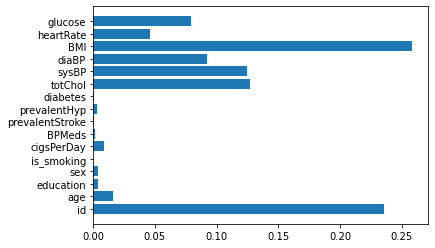

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

In [ ]:
X_train.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       594
           1       0.95      0.95      0.95       382

    accuracy                           0.96       976
   macro avg       0.96      0.96      0.96       976
weighted avg       0.96      0.96      0.96       976

0.9600409836065574


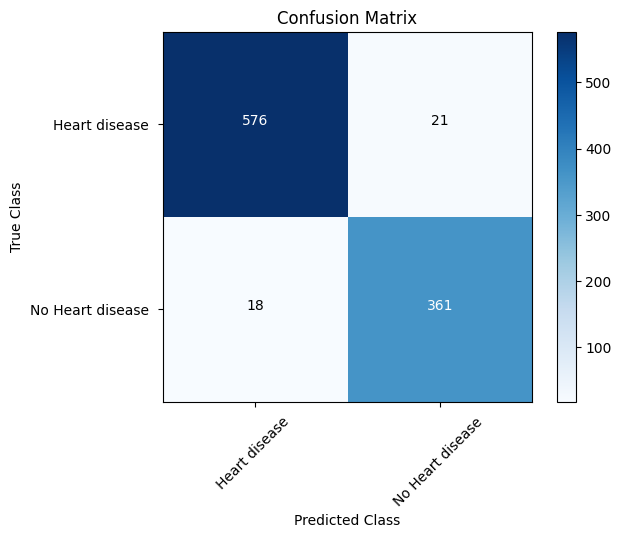

In [28]:
# GB Boost
X = df_upsampled.drop(["TenYearCHD"],axis=1)
Y = df_upsampled["TenYearCHD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model3 = GradientBoostingClassifier(random_state=45, learning_rate =0.1,n_estimators=10000,max_depth=10)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
fpr_Model3, tpr_Model3, thresholds_Model3 = roc_curve(y_test, y_pred)
roc_auc_Model3 = auc (fpr_Model3, tpr_Model3)
precision_Model3, recall_Model3, th_Model3 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model3,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
features =Model3.feature_importances_
features

array([0.12661068, 0.14783918, 0.02956053, 0.01506483, 0.00370709,
       0.04725802, 0.0013132 , 0.00230107, 0.02144447, 0.00112887,
       0.10660495, 0.10665534, 0.09500824, 0.11601589, 0.09346432,
       0.08602333])

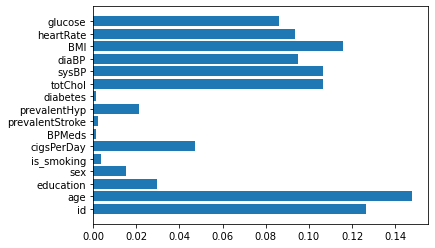

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       570
           1       0.96      0.89      0.92       406

    accuracy                           0.94       976
   macro avg       0.94      0.93      0.94       976
weighted avg       0.94      0.94      0.94       976

0.9395491803278688


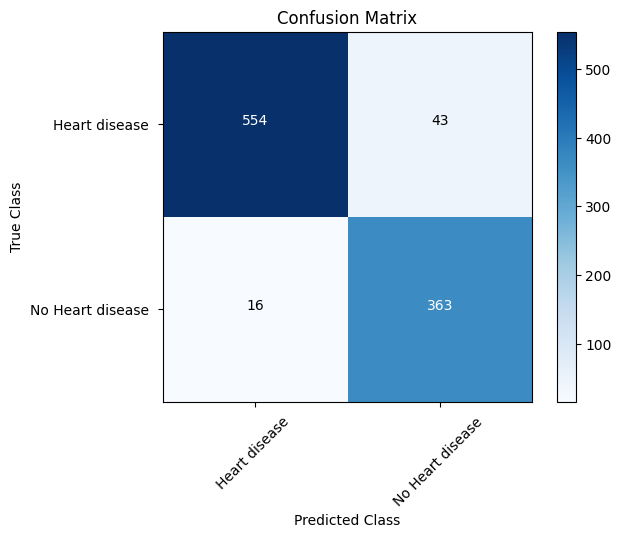

In [29]:
#LightGBM
X = df_upsampled.drop(["TenYearCHD"],axis=1)
Y = df_upsampled["TenYearCHD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model4 = LGBMClassifier(random_state=45, n_estimators= 10000, max_depth=8)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
fpr_Model4, tpr_Model4, thresholds_Model4 = roc_curve(y_test, y_pred)
roc_auc_Model4 = auc (fpr_Model4, tpr_Model4)
precision_Model4, recall_Model4, th_Model4 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model4,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#### Features Importance Bar Plot
featur_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
features =Model4.feature_importances_
features

array([11734,  5984,  1671,   929,   335,  2980,    61,    55,   648,
          40, 10133,  9974,  7710, 12377,  6128,  6769])

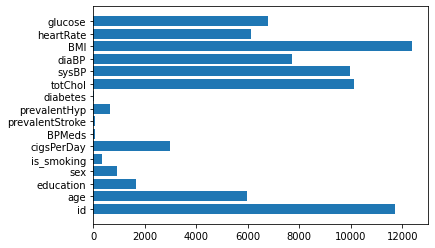

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

Learning rate set to 0.018427
0:	learn: 0.6887897	total: 51.5ms	remaining: 51.5s
1:	learn: 0.6838765	total: 55.2ms	remaining: 27.5s
2:	learn: 0.6799830	total: 58.8ms	remaining: 19.5s
3:	learn: 0.6762573	total: 62.4ms	remaining: 15.5s
4:	learn: 0.6727310	total: 66.1ms	remaining: 13.2s
5:	learn: 0.6683055	total: 69.6ms	remaining: 11.5s
6:	learn: 0.6646989	total: 73.2ms	remaining: 10.4s
7:	learn: 0.6608584	total: 76.8ms	remaining: 9.52s
8:	learn: 0.6575061	total: 80.4ms	remaining: 8.85s
9:	learn: 0.6540090	total: 84ms	remaining: 8.32s
10:	learn: 0.6502557	total: 87.6ms	remaining: 7.87s
11:	learn: 0.6467051	total: 91.1ms	remaining: 7.5s
12:	learn: 0.6431625	total: 94.6ms	remaining: 7.18s
13:	learn: 0.6404327	total: 98.2ms	remaining: 6.91s
14:	learn: 0.6382709	total: 102ms	remaining: 6.68s
15:	learn: 0.6352269	total: 105ms	remaining: 6.48s
16:	learn: 0.6320742	total: 109ms	remaining: 6.33s
17:	learn: 0.6291856	total: 113ms	remaining: 6.17s
18:	learn: 0.6268981	total: 117ms	remaining: 6.02s


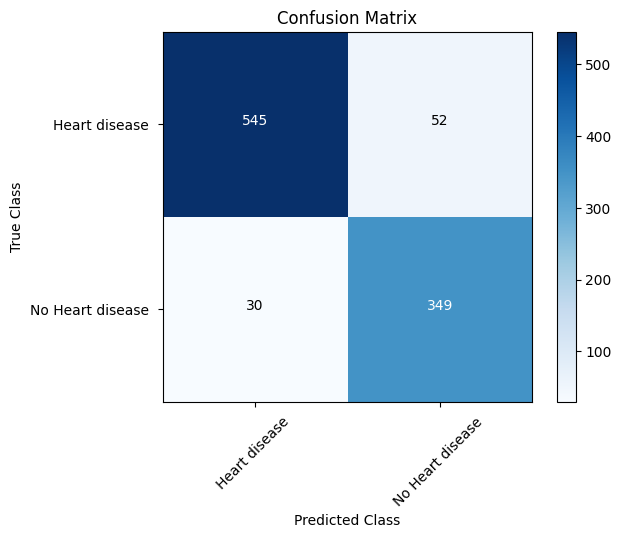

In [30]:
#CAT Boost
X = df_upsampled.drop(["TenYearCHD"],axis=1)
Y = df_upsampled["TenYearCHD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model5 = CatBoostClassifier(random_state=45, n_estimators=1000, max_depth=7)
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
fpr_Model5, tpr_Model5, thresholds_Model5 = roc_curve(y_test, y_pred)
roc_auc_Model5 = auc (fpr_Model5, tpr_Model5)
precision_Model5, recall_Model5, th_Model5 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model5,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
features =Model5.feature_importances_
features

array([ 9.86474569, 12.6329896 ,  4.57653461,  3.67258782,  0.84630269,
        6.1428636 ,  0.21736275,  0.1692086 ,  1.58861464,  0.09016042,
       10.47612707, 10.74334444,  8.83095744, 10.84645212, 10.22280893,
        9.07893959])

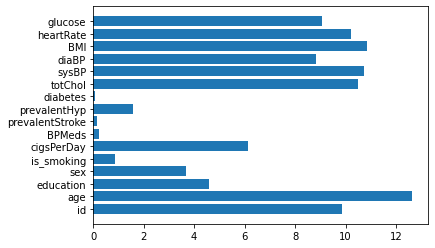

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [ ]:
X = data.drop(['TenYearCHD'],axis=1)
Y = data['TenYearCHD']

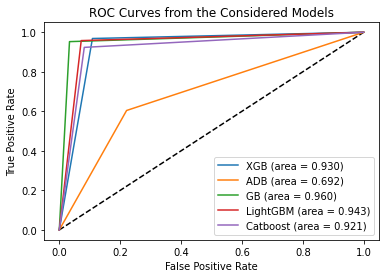

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Model1, tpr_Model1, label='XGB (area = %0.3f)' % roc_auc_Model1)
plt.plot(fpr_Model2, tpr_Model2, label='ADB (area = %0.3f)' % roc_auc_Model2)
plt.plot(fpr_Model3, tpr_Model3, label='GB (area = %0.3f)' % roc_auc_Model3)
plt.plot(fpr_Model4, tpr_Model4, label='LightGBM (area = %0.3f)' % roc_auc_Model4)
plt.plot(fpr_Model5, tpr_Model5, label='Catboost (area = %0.3f)' % roc_auc_Model5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.show()